In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [4]:
# !wget -O Data-collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv 

--2020-09-07 03:06:53--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-collisions.csv’

Data-collisions.csv 100%[===================>]  70.49M  20.1MB/s    in 3.6s    

2020-09-07 03:06:57 (19.3 MB/s) - ‘Data-collisions.csv’ saved [73917638/73917638]



In [23]:
#LOADING DATASET
collision_df = pd.read_csv('Data-collisions.csv',low_memory=False)
collision_df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [25]:
#DATA PREPARATION AND CLEANING
collision_cdf=collision_df[['SEVERITYCODE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL',
                            'SDOT_COLCODE','JUNCTIONTYPE','LIGHTCOND','ROADCOND','WEATHER','HITPARKEDCAR','SPEEDING','OBJECTID','INTKEY','PEDROWNOTGRNT']]

collision_cdf_T=collision_cdf.copy()

#Convert Categories to Numbers
collision_cdf_T["LIGHTCOND"] = collision_cdf_T["LIGHTCOND"].astype('category')
collision_cdf_T["ROADCOND"] = collision_cdf_T["ROADCOND"].astype('category')
collision_cdf_T["WEATHER"] = collision_cdf_T["WEATHER"].astype('category')
collision_cdf_T["INATTENTIONIND"] = collision_cdf_T["INATTENTIONIND"].astype('category')
collision_cdf_T["UNDERINFL"] = collision_cdf_T["UNDERINFL"].astype('category')
collision_cdf_T["HITPARKEDCAR"] = collision_cdf_T["HITPARKEDCAR"].astype('category')
collision_cdf_T["SPEEDING"] = collision_cdf_T["SPEEDING"].astype('category')
collision_cdf_T["COLLISIONTYPE"] = collision_cdf_T["COLLISIONTYPE"].astype('category')
collision_cdf_T["JUNCTIONTYPE"] = collision_cdf_T["JUNCTIONTYPE"].astype('category')
collision_cdf_T["PEDROWNOTGRNT"] = collision_cdf_T["PEDROWNOTGRNT"].astype('category')

collision_cdf_T["LIGHTCOND_N"] = collision_cdf_T["LIGHTCOND"].cat.codes
collision_cdf_T["ROADCOND_N"] = collision_cdf_T["ROADCOND"].cat.codes
collision_cdf_T["WEATHER_N"] = collision_cdf_T["WEATHER"].cat.codes
collision_cdf_T["INATTENTIONIND_N"] = collision_cdf_T["INATTENTIONIND"].cat.codes
collision_cdf_T["UNDERINFL_N"] = collision_cdf_T["UNDERINFL"].cat.codes
collision_cdf_T["HITPARKEDCAR_N"] = collision_cdf_T["HITPARKEDCAR"].cat.codes
collision_cdf_T["SPEEDING_N"] = collision_cdf_T["SPEEDING"].cat.codes
collision_cdf_T["COLLISIONTYPE_N"] = collision_cdf_T["COLLISIONTYPE"].cat.codes
collision_cdf_T["JUNCTIONTYPE_N"] = collision_cdf_T["JUNCTIONTYPE"].cat.codes
collision_cdf_T["PEDROWNOTGRNT_N"] = collision_cdf_T["PEDROWNOTGRNT"].cat.codes

#Drop ORiginal Field
collision_cdf_T.drop(['INATTENTIONIND','LIGHTCOND','ROADCOND','WEATHER','UNDERINFL','SPEEDING','HITPARKEDCAR','COLLISIONTYPE','JUNCTIONTYPE','PEDROWNOTGRNT'], axis=1, inplace=True)

#Normalize Data Field INTKEY and OBJECTID
collision_cdf_T["INTKEY"] = collision_cdf_T["INTKEY"] / collision_cdf_T["INTKEY"].max()
collision_cdf_T['INTKEY'] = collision_cdf_T['INTKEY'].replace(np.nan, 0)
collision_cdf_T["OBJECTID"] = collision_cdf_T["OBJECTID"] / collision_cdf_T["OBJECTID"].max()
collision_cdf_T['OBJECTID'] = collision_cdf_T['OBJECTID'].replace(np.nan, 0)

#Normalize Data FieldSEVERITYCODE
collision_cdf_T["SEVERITYCODE"] = collision_cdf_T["SEVERITYCODE"] -1
collision_cdf_T.head(5)

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,OBJECTID,INTKEY,LIGHTCOND_N,ROADCOND_N,WEATHER_N,INATTENTIONIND_N,UNDERINFL_N,HITPARKEDCAR_N,SPEEDING_N,COLLISIONTYPE_N,JUNCTIONTYPE_N,PEDROWNOTGRNT_N
0,1,2,0,0,2,11,0.000005,0.049467,5,8,4,-1,2,0,-1,0,1,-1
1,0,2,0,0,2,16,0.000009,0.000000,2,8,6,-1,0,0,-1,9,4,-1
2,0,4,0,0,3,14,0.000014,0.000000,5,0,4,-1,0,0,-1,5,4,-1
3,0,3,0,0,3,11,0.000018,0.000000,5,0,1,-1,2,0,-1,4,4,-1
4,1,2,0,0,2,11,0.000023,0.045391,5,8,6,-1,0,0,-1,0,1,-1


In [26]:
#Divide the data into Train and Test DataSets
msk = np.random.rand(len(collision_cdf_T)) < 0.8
train = collision_cdf_T[msk]
test = collision_cdf_T[~msk]

In [27]:
#Using Recursive Feature Elimination for selecting the features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Predictor_Matrix=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE',
                  'OBJECTID','INTKEY','LIGHTCOND_N','ROADCOND_N','WEATHER_N',
                  'INATTENTIONIND_N','UNDERINFL_N','HITPARKEDCAR_N','SPEEDING_N',
                  'COLLISIONTYPE_N','JUNCTIONTYPE_N','PEDROWNOTGRNT_N']
                  
train_x = np.asanyarray(train[Predictor_Matrix])
train_y = np.asanyarray(train['SEVERITYCODE'])

rfe = RFE(LogisticRegression(random_state=None, solver='liblinear'), 20)
rfe = rfe.fit(train_x, np.ravel(train_y,order='C'))
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [28]:
#Implementing the Model to refine Predictor Variables using Logistic Regression
import statsmodels.api as sm
logit_model=sm.Logit(train_y,train_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.522739
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.144      
Dependent Variable: y                AIC:              163110.8293
Date:               2020-09-08 04:18 BIC:              163280.1068
No. Observations:   155983           Log-Likelihood:   -81538.    
Df Model:           16               LL-Null:          -95217.    
Df Residuals:       155966           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1         0.2159     0.0053    40.3981   0.0000    0.2054    0.2263
x2         2.8574     0.0492    58.0590   0.0

In [13]:
#Implementing the Model with refined Predictor Variables using Logistic Regression
import statsmodels.api as sm
Predictor_Matrix_N=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE',
                 'INTKEY','LIGHTCOND_N','ROADCOND_N','WEATHER_N',
                  'INATTENTIONIND_N','UNDERINFL_N','HITPARKEDCAR_N','SPEEDING_N',
                  'COLLISIONTYPE_N','JUNCTIONTYPE_N','PEDROWNOTGRNT_N']
                  

train_x = np.asanyarray(train[Predictor_Matrix_N])
train_y = np.asanyarray(train['SEVERITYCODE'])
logit_model=sm.Logit(train_y,train_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.521968
         Iterations 7
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.144      
Dependent Variable: y                AIC:              162770.1964
Date:               2020-09-08 02:00 BIC:              162929.5068
No. Observations:   155889           Log-Likelihood:   -81369.    
Df Model:           15               LL-Null:          -95085.    
Df Residuals:       155873           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
--------------------------------------------------------------------
           Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1         0.2174     0.0053    40.6612   0.0000    0.2069    0.2279
x2         2.8899     0.0492    58.7902   0.0

LOGISTIC REGRESSION
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.96      0.84     27221
           1       0.75      0.25      0.38     11669

   micro avg       0.75      0.75      0.75     38890
   macro avg       0.75      0.61      0.61     38890
weighted avg       0.75      0.75      0.70     38890

Confusion Matrix


<AxesSubplot:>

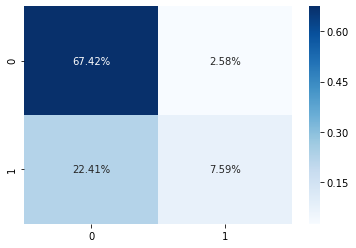

In [14]:
#Result and Model Testing 
#Model : LOGISTIC REGRESSION
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Predictor_Matrix_N=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE',
                  'INTKEY','LIGHTCOND_N','ROADCOND_N','WEATHER_N',
                  'INATTENTIONIND_N','UNDERINFL_N','HITPARKEDCAR_N','SPEEDING_N',
                  'COLLISIONTYPE_N','JUNCTIONTYPE_N','PEDROWNOTGRNT_N']

train_x = np.asanyarray(train[Predictor_Matrix_N])
train_y = np.asanyarray(train['SEVERITYCODE'])

print('LOGISTIC REGRESSION')
#Fit Training date to Logistic Regression
logreg = LogisticRegression(random_state=None, solver='liblinear')
logreg.fit(train_x, train_y)

#test Data sets
test_x = np.asanyarray(test[Predictor_Matrix_N])
test_y = np.asanyarray(test[['SEVERITYCODE']])

#Predict Test Data - Logistic Regression
pred_y_logreg = logreg.predict(test_x)

#Confusion Matrices
confusion_matrix_logreg = confusion_matrix(test_y, pred_y_logreg)

#Classification Report
print('Classification Report')
print(classification_report(test_y, pred_y_logreg))

print('Confusion Matrix')
sns.heatmap(confusion_matrix_logreg/np.sum(confusion_matrix_logreg), annot=True, 
            fmt='.2%', cmap='Blues')

GAUSSIAN NAIVE BAYES
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     27221
           1       0.76      0.23      0.35     11669

   micro avg       0.75      0.75      0.75     38890
   macro avg       0.75      0.60      0.59     38890
weighted avg       0.75      0.75      0.69     38890

Confusion Matrix


<AxesSubplot:>

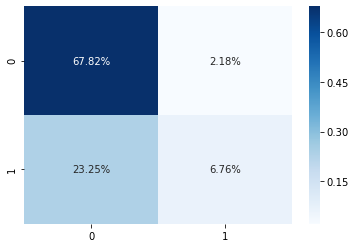

In [15]:
#Result and Model Testing 
#Model : GAUSSIAN NAIVE BAYES
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Predictor_Matrix_N=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE',
                  'INTKEY','LIGHTCOND_N','ROADCOND_N','WEATHER_N',
                  'INATTENTIONIND_N','UNDERINFL_N','HITPARKEDCAR_N','SPEEDING_N',
                  'COLLISIONTYPE_N','JUNCTIONTYPE_N','PEDROWNOTGRNT_N']

train_x = np.asanyarray(train[Predictor_Matrix_N])
train_y = np.asanyarray(train['SEVERITYCODE'])

print('GAUSSIAN NAIVE BAYES')
#Fit Training date to Gaussian Naive Bayes
gnb_cl=GaussianNB()
gnb_cl.fit(train_x, train_y)

#test Data sets
test_x = np.asanyarray(test[Predictor_Matrix_N])
test_y = np.asanyarray(test[['SEVERITYCODE']])

#Predict Test Data - Gaussian Naive Bayes
pred_y_gnb=gnb_cl.predict(test_x)

#Confusion Matrices
confusion_matrix_gnb = confusion_matrix(test_y, pred_y_gnb)

#Classification Repoirts
print('Classification Report')
print(classification_report(test_y, pred_y_gnb))

print('Confusion Matrix')
sns.heatmap(confusion_matrix_gnb/np.sum(confusion_matrix_gnb), annot=True, 
            fmt='.2%', cmap='Blues')



RANDOM FOREST CLASSIFIER
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85     27221
           1       0.72      0.34      0.46     11669

   micro avg       0.76      0.76      0.76     38890
   macro avg       0.75      0.64      0.66     38890
weighted avg       0.76      0.76      0.73     38890

Confusion Matrix


<AxesSubplot:>

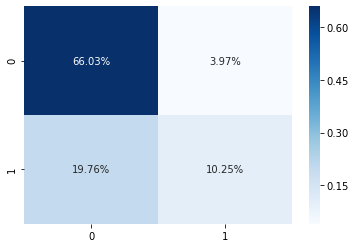

In [16]:
#Result and Model Testing 
#Model : RANDOM FOREST CLASSIFIER
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Predictor_Matrix_N=['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','SDOT_COLCODE',
                  'INTKEY','LIGHTCOND_N','ROADCOND_N','WEATHER_N',
                  'INATTENTIONIND_N','UNDERINFL_N','HITPARKEDCAR_N','SPEEDING_N',
                  'COLLISIONTYPE_N','JUNCTIONTYPE_N','PEDROWNOTGRNT_N']

train_x = np.asanyarray(train[Predictor_Matrix_N])
train_y = np.asanyarray(train['SEVERITYCODE'])

print('RANDOM FOREST CLASSIFIER')
#Fit Training date to Random Forest Classifier
rfc_cl=RandomForestClassifier(n_estimators=100, min_samples_leaf=20)
rfc_cl.fit(train_x, train_y)

#test Data sets
test_x = np.asanyarray(test[Predictor_Matrix_N])
test_y = np.asanyarray(test[['SEVERITYCODE']])

#Predict Test Data - Random Forest Classifier
pred_y_rfc=rfc_cl.predict(test_x)

#Confusion Matrices
confusion_matrix_rfc = confusion_matrix(test_y, pred_y_rfc)

#Classification Reports
print('Classification Report')
print(classification_report(test_y, pred_y_rfc))

print('Confusion Matrix')
sns.heatmap(confusion_matrix_rfc/np.sum(confusion_matrix_rfc), annot=True, 
            fmt='.2%', cmap='Blues')

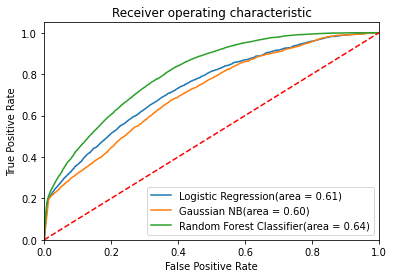

In [19]:
#ROC Curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

train_x = np.asanyarray(train[Predictor_Matrix_N])
train_y = np.asanyarray(train['SEVERITYCODE'])

test_x = np.asanyarray(test[Predictor_Matrix_N])
test_y = np.asanyarray(test[['SEVERITYCODE']])

logreg= LogisticRegression(random_state=None, solver='liblinear')
logreg.fit(train_x, train_y)

gnb_cl=GaussianNB()
gnb_cl.fit(train_x, train_y)

rfc_cl=RandomForestClassifier(n_estimators=100, min_samples_leaf=20)
rfc_cl.fit(train_x, train_y)

roc_auc_1 = roc_auc_score(test_y, logreg.predict(test_x))
fpr_1, tpr_1, thresholds_1 = roc_curve(test_y, logreg.predict_proba(test_x)[:,1])

roc_auc_2 = roc_auc_score(test_y, gnb_cl.predict(test_x))
fpr_2, tpr_2, thresholds_2 = roc_curve(test_y, gnb_cl.predict_proba(test_x)[:,1])

roc_auc_3 = roc_auc_score(test_y, rfc_cl.predict(test_x))
fpr_3, tpr_3, thresholds_3 = roc_curve(test_y, rfc_cl.predict_proba(test_x)[:,1])


plt.figure()
plt.plot(fpr_1, tpr_1, label='Logistic Regression(area = %0.2f)' % roc_auc_1)
plt.plot(fpr_2, tpr_2, label='Gaussian NB(area = %0.2f)' % roc_auc_2)
plt.plot(fpr_3, tpr_3, label='Random Forest Classifier(area = %0.2f)' % roc_auc_3)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()